In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
pd.set_option('display.max_columns', 25)

In [29]:
df = pd.read_csv('/content/spotify.csv', encoding='latin-1')
df.shape
df.drop('key', axis = 1)
# df.head()
# df.columns
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df.dtypes
# df.isna().sum()
# df.loc[df.duplicated()]
# df.loc[df.duplicated(subset=['track_name'])]

,0
track_name,object
artist(s)_name,object
artist_count,int64
released_year,int64
released_month,int64
released_day,int64
in_spotify_playlists,int64
in_spotify_charts,int64
streams,float64
in_apple_playlists,int64


In [8]:
# df.query('track_name == "SNAP"')
df.loc[df.duplicated(subset = ['track_name','artist(s)_name'])]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,0,18,0,24,166,C#,Major,70,57,57,9,20,11,7
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,73,344,0,0,121,G#,Major,75,53,74,2,0,11,5
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,49,272,21,24,109,A#,Minor,84,72,74,10,0,34,7
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,3,0,63,0,353,170,NaN,Major,56,52,64,11,0,45,7


In [9]:
df = df.loc[~df.duplicated(subset = ['track_name','artist(s)_name'])].reset_index(drop=True).copy()
df.shape

(949, 24)

In [10]:
df[['bpm','danceability_%']].describe()

,bpm,danceability_%
count,949.000000,949.000000
mean,122.460485,66.951528
std,28.035537,14.644010
min,65.000000,23.000000
25%,99.000000,57.000000
50%,120.000000,69.000000
75%,140.000000,78.000000
max,206.000000,96.000000


In [11]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


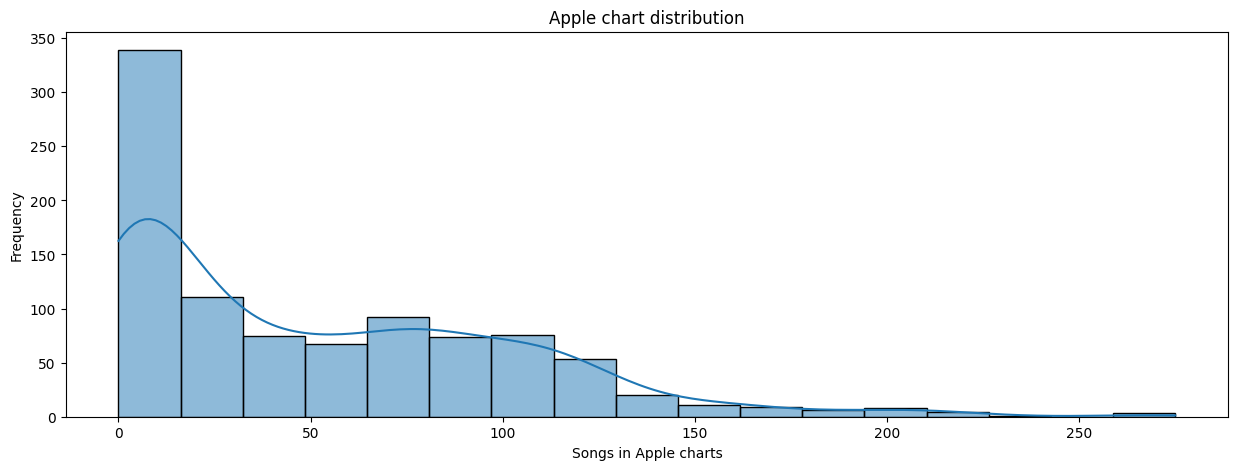

In [25]:
plt.figure(figsize=(15, 5))
sns.histplot(df['in_apple_charts'],  kde=True)
plt.title('Apple chart distribution')
plt.xlabel('Songs in Apple charts')
plt.ylabel('Frequency')
plt.show()


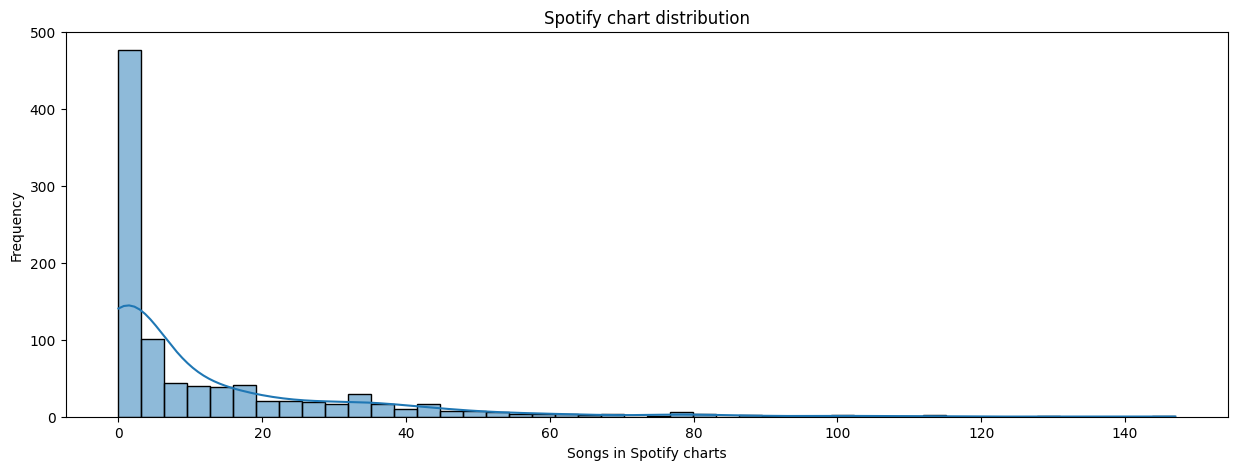

In [26]:
plt.figure(figsize=(15, 5))
sns.histplot(df['in_spotify_charts'],  kde=True)
plt.title('Spotify chart distribution')
plt.xlabel('Songs in Spotify charts')
plt.ylabel('Frequency')
plt.show()

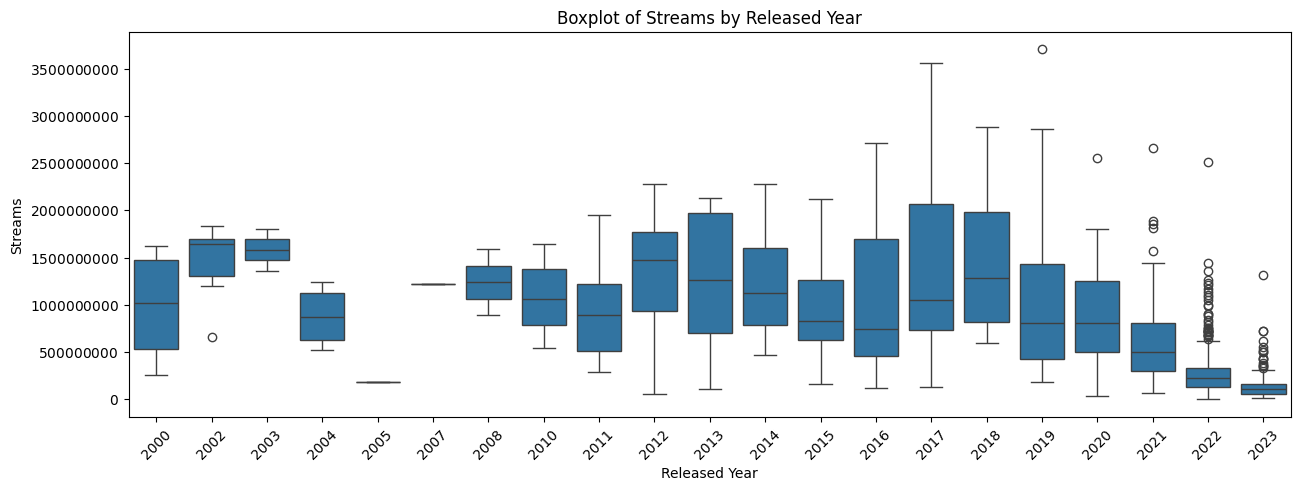

In [43]:
import matplotlib.ticker as ticker
df_recent = df[df['released_year'] >= 2000]
plt.figure(figsize=(15, 5))
sns.boxplot(x='released_year', y='streams', data=df_recent)
plt.title('Boxplot of Streams by Released Year')
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation = 45)
plt.xlabel('Released Year')
plt.ylabel('Streams')
plt.show()

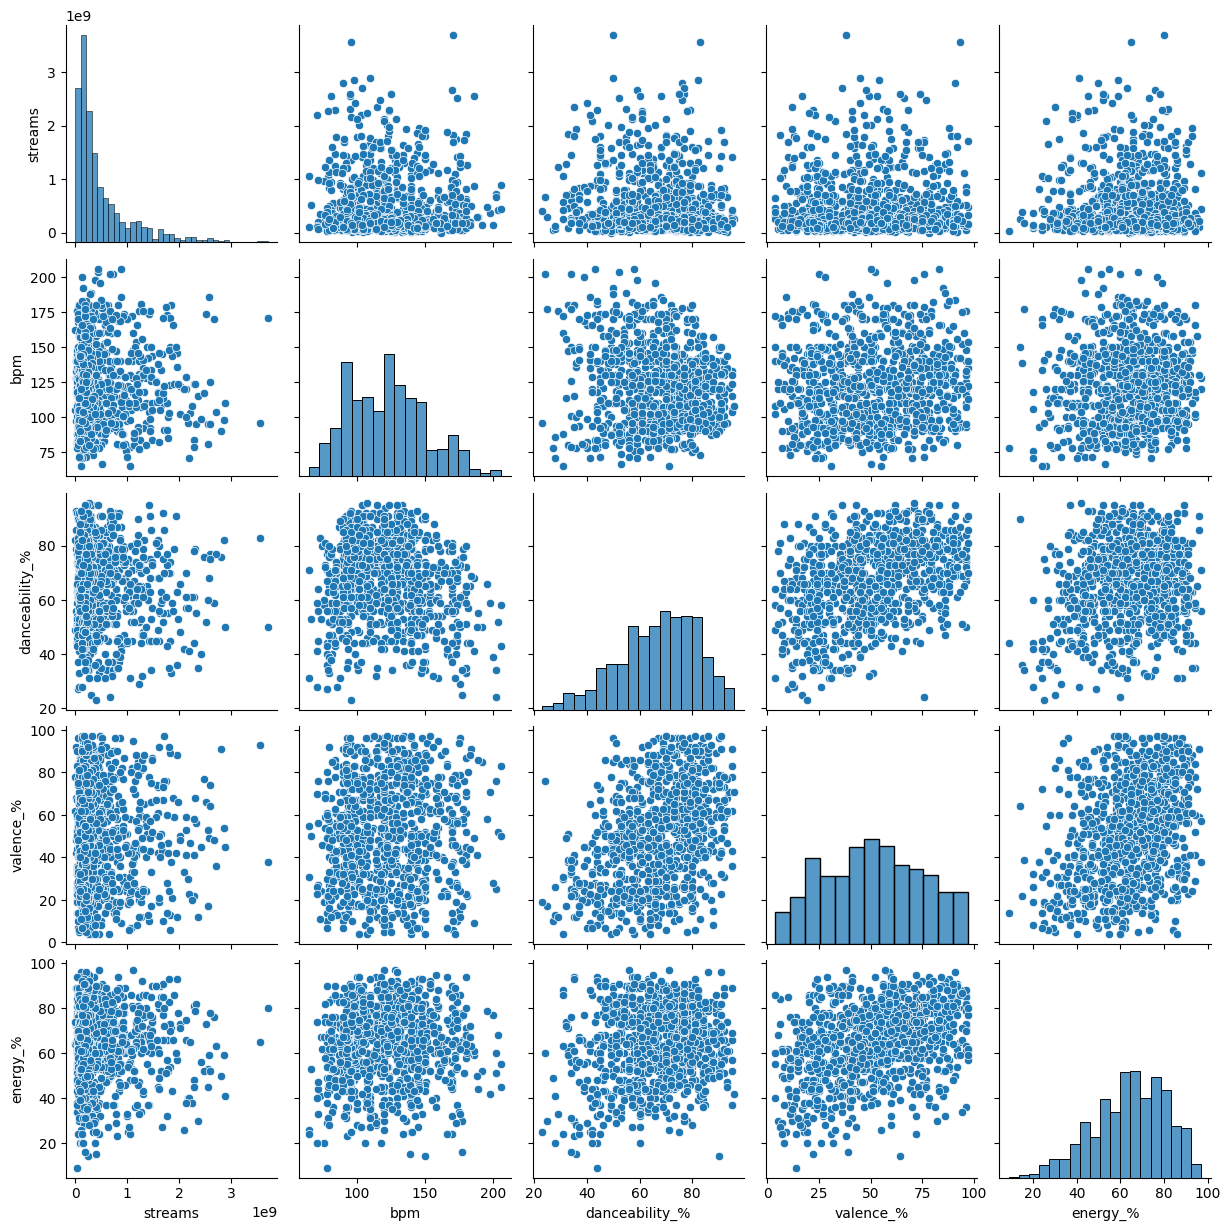

In [46]:
data = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%']
sns.pairplot(df[data])
plt.show()

Text(0, 0.5, 'Danceability')

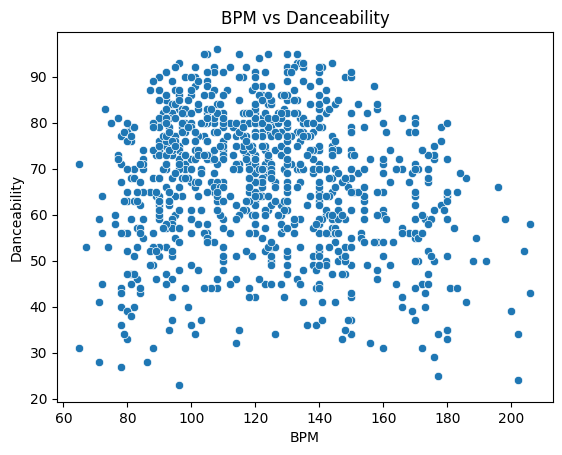

In [13]:
ax = sns.scatterplot(data=df, x='bpm', y='danceability_%')
ax.set_title('BPM vs Danceability')
ax.set_xlabel('BPM')
ax.set_ylabel('Danceability')

Text(0, 0.5, 'Number of Songs')

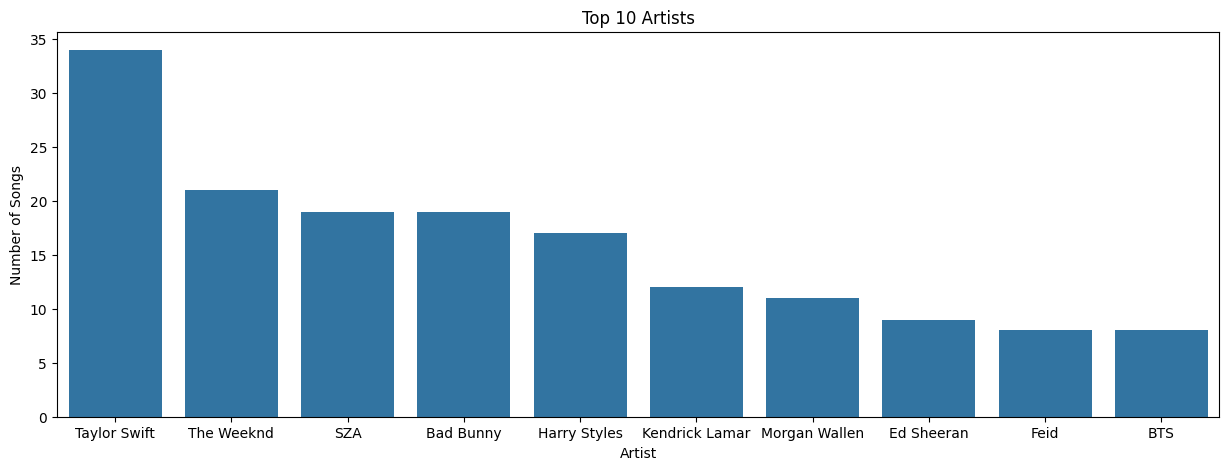

In [14]:

fig = plt.subplots(figsize=(15, 5))
ax = sns.barplot(x=df['artist(s)_name'].value_counts()[:10].index, y=df['artist(s)_name'].value_counts()[:10].values)
ax.set_title('Top 10 Artists')
ax.set_xlabel('Artist')
ax.set_ylabel('Number of Songs')

<Axes: >

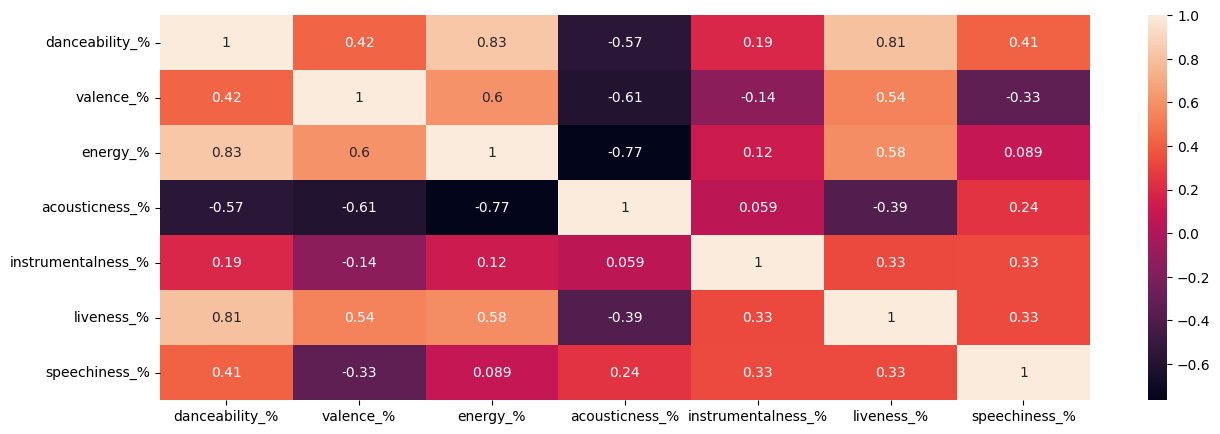

In [15]:
top_10_songs = df.sort_values(by='streams', ascending=False).head(10)
features = top_10_songs[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%','instrumentalness_%', 'liveness_%', 'speechiness_%']]
plt.figure(figsize = (15,5))
sns.heatmap(features.corr(), annot = True)

No. of songs per year

Text(0, 0.5, 'No. of songs')

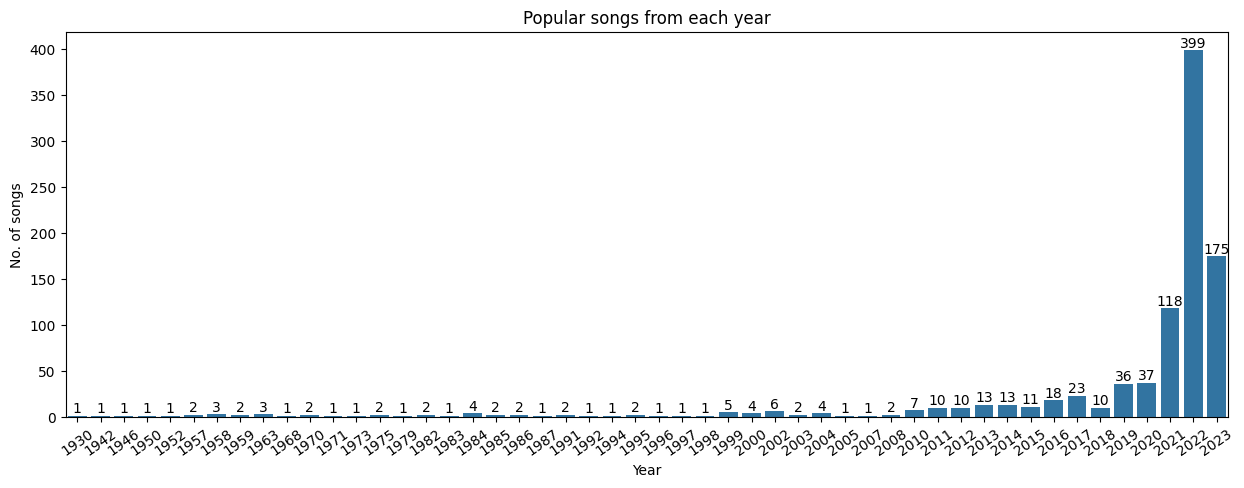

In [16]:
song_count = df['released_year'].value_counts()
fig = plt.subplots(figsize = (15,5))
ax = sns.barplot(x = song_count.index, y = song_count )
ax.set_title('Popular songs from each year')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Year')
plt.xticks(rotation = 35)
ax.set_ylabel('No. of songs')

Text(24.000000000000007, 0.5, 'Number of Songs')

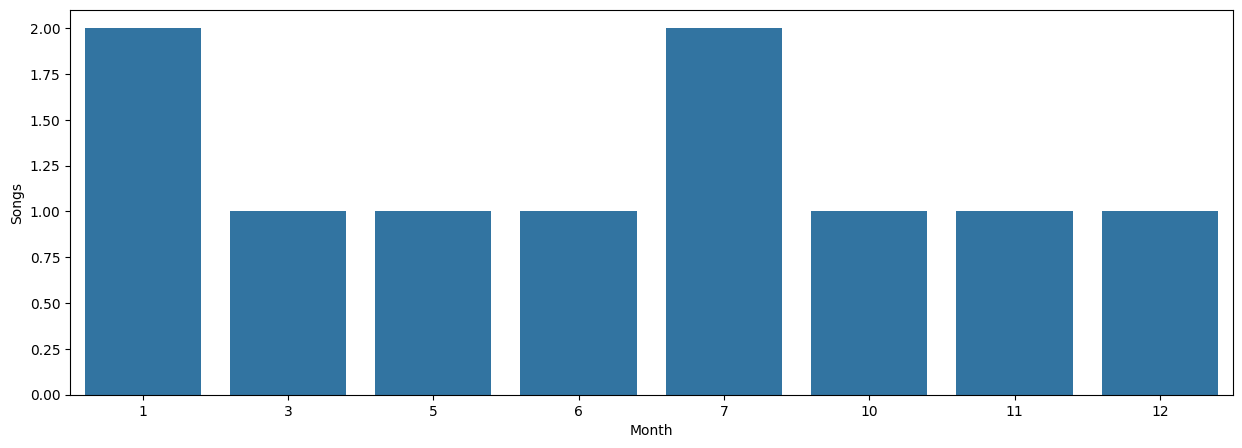

In [17]:

top_songs = df.sort_values(by='streams', ascending=False).head(10)
month_grouped = top_songs.groupby('released_month').size().reset_index().rename(columns={0:'Songs','released_month':'Month'})
# print(month_grouped)
fig = plt.subplots(figsize = (15,5))
p = sns.barplot(x = 'Month', y = 'Songs', data = month_grouped )
ax.set_title('Month in which most popular releases occurred')
ax.set_xlabel('Month')
ax.set_xticks(month_grouped.index)
ax.set_xticklabels(month_grouped.index)
ax.set_ylabel('Number of Songs')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Love Grows (Where My Rosemary Goes)'),
  Text(1, 0, 'Anti-Hero'),
  Text(2, 0, 'Arcade'),
  Text(3, 0, 'Glimpse of Us'),
  Text(4, 0, 'Seek & Destroy'),
  Text(5, 0, 'Summertime Sadness'),
  Text(6, 0, 'Come Back Home - From "Purple Hearts"'),
  Text(7, 0, 'Where Are You Now'),
  Text(8, 0, 'I Love You So'),
  Text(9, 0, 'Queencard')])

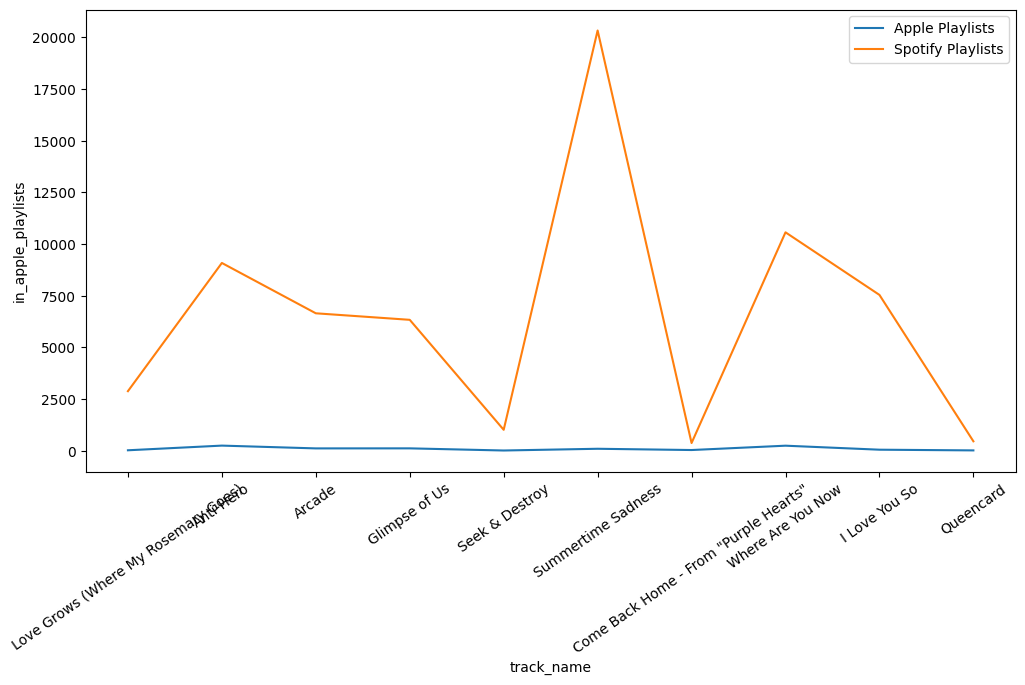

In [18]:

chart_comp = top_songs[['track_name','in_apple_playlists','in_spotify_playlists']]
fig= plt.subplots(figsize=(12, 6))
sns.lineplot(data=chart_comp, x='track_name', y='in_apple_playlists', label='Apple Playlists')
sns.lineplot(data=chart_comp, x='track_name', y='in_spotify_playlists', label='Spotify Playlists')
plt.xticks(rotation = 35)
# print(chart_comp)

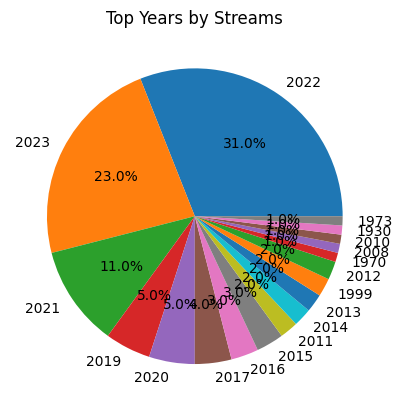

In [19]:
top_100 = df.sort_values(by='streams', ascending=False).head(100)
year_counts = top_100['released_year'].value_counts()
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%')
plt.title('Top Years by Streams')
plt.show()